In [175]:
import pandas as pd
import movekit as mkit
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [2]:
ts_dat = pd.read_csv('./datasets/ts_fish.csv')
dat = pd.read_csv('./datasets/fish-5.csv')

In [35]:
dat.head()

,time,animal_id,x,y
0,1,312,405.29,417.76
1,1,511,369.99,428.78
2,1,607,390.33,405.89
3,1,811,445.15,411.94
4,1,905,366.06,451.76


In [36]:
ts_dat.head()

,frame,id,x,y,cid,theta
0,0,0,806.951854,474.716492,0,198.814574
1,0,1,673.296668,61.680564,1,201.310044
2,0,2,386.352979,463.612863,2,311.144474
3,0,3,759.402339,309.349340,3,75.646197
4,0,4,353.513334,153.428403,4,191.646603


In [4]:
ts_dat = ts_dat.rename(columns={"frame": "time", "id": "animal_id"})

### Size 
Range of 126 Records for a total of 500 units

In [11]:
ts_dat[ts_dat.time == 1]

,time,animal_id,x,y,cid,theta
500,1,0,471.783850,294.834393,0,195.206454
501,1,1,902.729337,623.624130,1,189.622786
502,1,2,684.462483,455.968501,2,253.104247
503,1,3,165.847161,461.252019,3,230.937147
504,1,4,491.793643,704.702355,4,281.326518
...,...,...,...,...,...,...
995,1,495,364.524172,372.161714,5,148.616207
996,1,496,1072.309419,531.091321,6,213.538860
997,1,497,461.852455,249.792837,0,138.258330
998,1,498,876.502501,634.393590,1,164.488425


In [5]:
ts_feats = mkit.extract_features(ts_dat)

In [20]:
ts_feats.head()

,time,animal_id,x,y,cid,theta,direction,distance,average_speed,average_acceleration,stopped
0,0,0,491.128883,300.092662,0,182.608762,0.000000,0.000000,13.234156,-0.092247,0
1,1,0,471.783850,294.834393,0,195.206454,-164.793546,20.046938,13.141910,-0.092247,0
2,2,0,453.837880,284.182641,0,210.691062,-149.308938,20.869059,14.527351,-0.092247,0
3,3,0,454.708627,290.237450,0,81.816354,81.816354,6.117100,14.909402,-0.092247,0
4,4,0,457.684285,309.142382,0,81.054970,81.054970,19.137685,14.957855,-0.092247,0


### Already existing implementation of ts_cluster

In [39]:
ts_cls = mkit.ts_cluster(ts_feats, n_clust = 7)

In [42]:
ts_cls.head()

,time,animal_id,x,y,cid,theta,direction,distance,average_speed,average_acceleration,stopped,cluster,ClustCenter,centroid_distance,centroid_average_speed,centroid_average_acceleration,centroid_direction,centroid_stopped
0,0,0,806.951854,474.716492,0,198.814574,0.000000,0.000000,8.333173,0.486966,0,1,"[0.0, 8.805684038316617, 0.36208287093627106, ...",0.000000,8.805684,0.362083,0.000000,0.0
1,1,0,796.571711,470.896147,0,200.205816,-159.794184,11.060850,8.820139,0.486966,0,1,"[10.814053342498381, 9.167766909252892, 0.3620...",10.814053,9.167767,0.362083,-92.005089,0.0
2,2,0,786.999456,462.070483,0,222.676202,-137.323798,13.020000,9.098414,0.486966,0,1,"[10.82786681225548, 9.455019558388091, 0.36208...",10.827867,9.455020,0.362083,-93.401049,0.0
3,3,0,788.060798,454.849055,0,278.360971,-81.639029,7.299004,9.588612,0.486966,0,1,"[11.281608216818197, 9.619761026776967, 0.3620...",11.281608,9.619761,0.362083,-77.633722,0.0
4,4,0,788.093711,444.563098,0,270.183331,-89.816669,10.286010,9.969877,0.486966,0,1,"[11.104891820011051, 9.779802359089281, 0.3620...",11.104892,9.779802,0.362083,-86.539155,0.0


In [40]:
snapshot = ts_cls[ts_cls.time == 5]



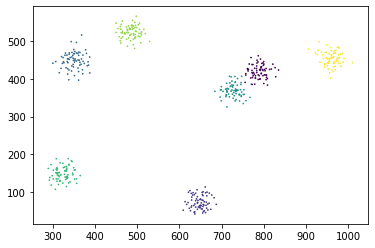

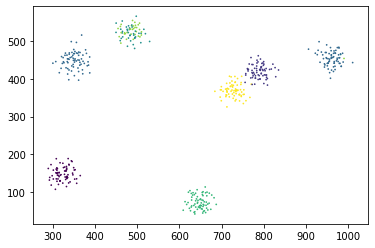

In [45]:
# Plotting the clusters for spatial vs feature based (spatial clusters came in with generated data)
ax=plt.subplot()
plt.scatter(x = snapshot.x, y = snapshot.y, c = snapshot.cid, s = 0.5)
plt.show()

ax = plt.subplot()
plt.scatter(x = snapshot.x, y = snapshot.y, c = snapshot.cluster, s = 0.5)
plt.show()

### Hierarchical Clustering

In [6]:
feats = mkit.extract_features(dat)

In [16]:
dt = mkit.dtw_matrix(feats)

In [ ]:
dtw = mkit.dtw_matrix(ts_feats)

In [8]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
y = np.array([[2,2], [3,3], [4,4]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

2.8284271247461903


### Obtaining fast dtw algorithm
c++ based implementation also works for multidimensional time series data

In [10]:
import dtaidistance as dst
from dtaidistance import dtw, dtw_ndim, clustering

### Two mkit inherent functions 
Used for local implementation here

In [40]:
def grouping_data(processed_data, pick_vars=None):
    """
    Function to group data records by 'animal_id'. Adds additional attributes/columns, if features aren't extracted yet.
    :param processed_data: pd.DataFrame with all preprocessed records.
    :return: dictionary with 'animal_id' as key and all records as value.
    """

    # A dictionary object to hold all groups obtained using group by-
    # Apply grouping using 'animal_id' attribute-
    data_animal_id = processed_data.groupby('animal_id')

    # A dictionary object to hold all groups obtained using group by-
    data_animal_id_groups = {}

    # Get each animal_id's data from grouping performed-
    for animal_id in data_animal_id.groups.keys():
        data_animal_id_groups[animal_id] = data_animal_id.get_group(animal_id)

    # To reset index for each group-
    for animal_id in data_animal_id_groups.keys():
        data_animal_id_groups[animal_id].reset_index(drop=True, inplace=True)
    if list(processed_data.columns.values) == list(
        ['time', 'animal_id', 'x', 'y']):
        # Add additional attributes/columns to each groups-
        for aid in data_animal_id_groups.keys():
            data = [None for x in range(data_animal_id_groups[aid].shape[0])]
            data_animal_id_groups[aid] = data_animal_id_groups[aid].assign(
                distance=data)
            data_animal_id_groups[aid] = data_animal_id_groups[aid].assign(
                average_speed=data)
            data_animal_id_groups[aid] = data_animal_id_groups[aid].assign(
                average_acceleration=data)
            # data_animal_id_groups[aid] = data_animal_id_groups[aid].assign(
            #     positive_acceleration=data)
            data_animal_id_groups[aid] = data_animal_id_groups[aid].assign(
                direction=data)
            data_animal_id_groups[aid] = data_animal_id_groups[aid].assign(
                stopped=data)
    if pick_vars != None:
        for aid in data_animal_id_groups.keys():
            data_animal_id_groups[aid] = data_animal_id_groups[
                aid].loc[:, pick_vars]
    return data_animal_id_groups

In [92]:
def get_trajectories(data_groups):
    """
    Obtain trajectories out of a grouped dictionary with multiple ids.
    :param data_groups: Grouped dictionary by animal_id.
    :return: Grouped dictionary by animal id, containing tuples of positions in 2d coordinate system.
    """

    # create new dictionary
    trajectories = []
    for aid in data_groups.keys():
        # add dict item, holding x-y tuples for the trajectories of each animal id
        trajectories.append(list(
            np.dstack((data_groups[aid]["direction"], data_groups[aid]["distance"], data_groups[aid]["average_speed"], data_groups[aid]["average_acceleration"], data_groups[aid]["stopped"] ))[0].tolist()))
    return trajectories

In [47]:
ts_feats.head()

,time,animal_id,x,y,cid,theta,direction,distance,average_speed,average_acceleration,stopped
0,0,0,806.951854,474.716492,0,198.814574,0.000000,0.000000,8.333173,0.486966,0
1,1,0,796.571711,470.896147,0,200.205816,-159.794184,11.060850,8.820139,0.486966,0
2,2,0,786.999456,462.070483,0,222.676202,-137.323798,13.020000,9.098414,0.486966,0
3,3,0,788.060798,454.849055,0,278.360971,-81.639029,7.299004,9.588612,0.486966,0
4,4,0,788.093711,444.563098,0,270.183331,-89.816669,10.286010,9.969877,0.486966,0


In [93]:
# Bring feature data into right format: Arrays for each animal's values over all timesteps
ts_group = grouping_data(ts_feats)
ts_traj = get_trajectories(ts_group)
ts_arr = np.array(ts_traj)

### DTW multidimensional distance matrix
See https://link.springer.com/article/10.1007/s10618-016-0455-0 for further discussion

In [192]:
distance_matrix = dtw_ndim.distance_matrix_fast(ts_arr, 5)

In [186]:
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram

### Building clustering function based on draft
https://towardsdatascience.com/how-to-apply-hierarchical-clustering-to-time-series-a5fe2a7d8447

In [190]:
def hierarchical_clustering(dist_mat, method='complete'):
    if method == 'complete':
        Z = complete(distance_matrix)
    if method == 'single':
        Z = single(distance_matrix)
    if method == 'average':
        Z = average(distance_matrix)
    if method == 'ward':
        Z = ward(distance_matrix)
    
    fig = plt.figure(figsize=(16, 8))
    dn = dendrogram(Z)
    plt.title(f"Dendrogram for {method}-linkage with correlation distance")
    plt.show()
    
    return Z

/home/luke/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:356: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')
100%|█████████▉| 499/500 [34:39<00:04,  4.17s/it] 


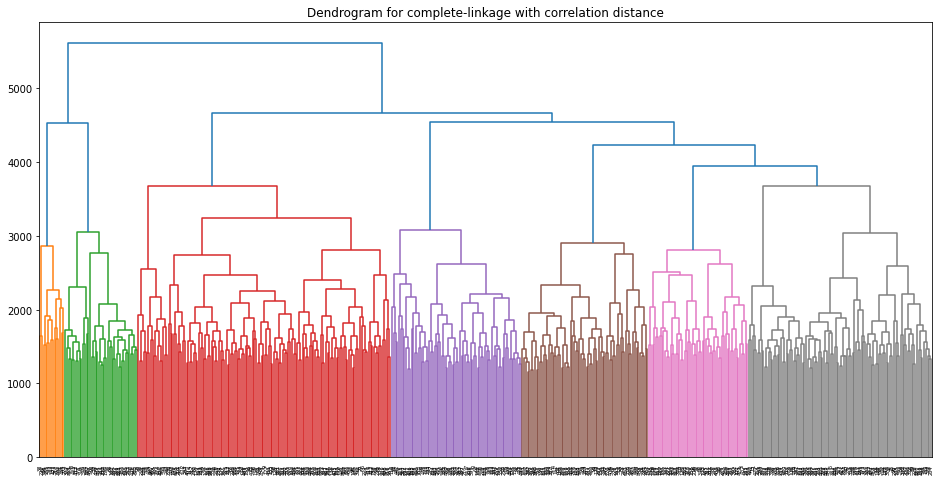

In [193]:
linkage_matrix = hierarchical_clustering(dists1)

### Customize cluster selection 

In [194]:
from scipy.cluster.hierarchy import fcluster

# select maximum number of clusters
cluster_labels = fcluster(linkage_matrix, 4, criterion='maxclust')
print(np.unique(cluster_labels))
#>> 4 unique clusters
cluster_labels = fcluster(linkage_matrix, 7, criterion='maxclust')
print(np.unique(cluster_labels))
#>> 10 unique clusters

# hand-select an appropriate cut-off on the dendrogram
cluster_labels = fcluster(linkage_matrix, 600, criterion='distance')
print(np.unique(cluster_labels))
#>> 3 unique clusters
cluster_labels = fcluster(linkage_matrix, 3900, criterion='distance')
print(np.unique(cluster_labels))

[1 2 3 4]
[1 2 3 4 5 6 7]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 

### Encoding Decoding


### Optimize Clustering through Encoding